In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from essentia.standard import *
w = Windowing(type = 'hann')
spectrum = Spectrum()  # FFT() would return the complex FFT, here we just want the magnitude spectrum
mfcc = MFCC()

In [22]:
audio = MonoLoader(filename="/home/jan_dev/loops/disco/125bpm/Nu_Disco_02a(125BPM).wav")()

In [23]:
logNorm = UnaryOperator(type='log')

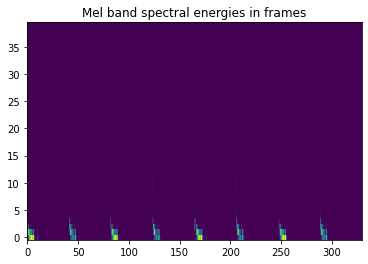

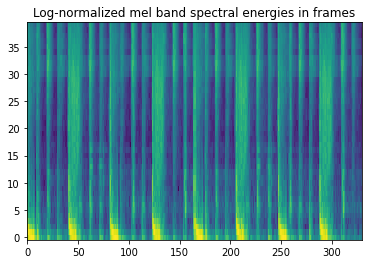

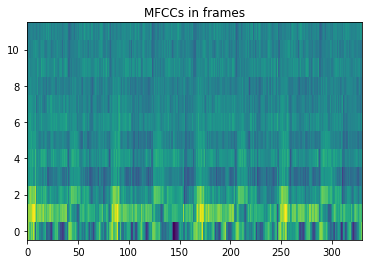

In [24]:
mfccs = []
melbands = []
melbands_log = []

for frame in FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=True):
    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))
    mfccs.append(mfcc_coeffs)
    melbands.append(mfcc_bands)
    melbands_log.append(logNorm(mfcc_bands))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
mfccs = essentia.array(mfccs).T
melbands = essentia.array(melbands).T
melbands_log = essentia.array(melbands_log).T

# and plot
plt.imshow(melbands[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Mel band spectral energies in frames")
plt.show()

plt.imshow(melbands_log[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Log-normalized mel band spectral energies in frames")
plt.show()

plt.imshow(mfccs[1:,:], aspect='auto', origin='lower', interpolation='none')
plt.title("MFCCs in frames")
plt.show()